<a href="https://colab.research.google.com/github/pepesrz91/machine-learning-2021-mcc/blob/master/ProjectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve, roc_auc_score
figure(figsize=(1, 1), dpi=80)

<Figure size 80x80 with 0 Axes>

<Figure size 80x80 with 0 Axes>

Parte 1. Análisis numérico y gráfico de los datos. 

# Información sobre los datos

Los datos a utilizar se encuentran en: 
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients  



In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Presentaciones/default_cards.csv")

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Eliminal la columna ID ya que está solo puede meter ruido en nuestro modelo y no tiene importancia.

In [ ]:
data = data.drop("ID", 1)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1574da1890>,
      dtype=object)

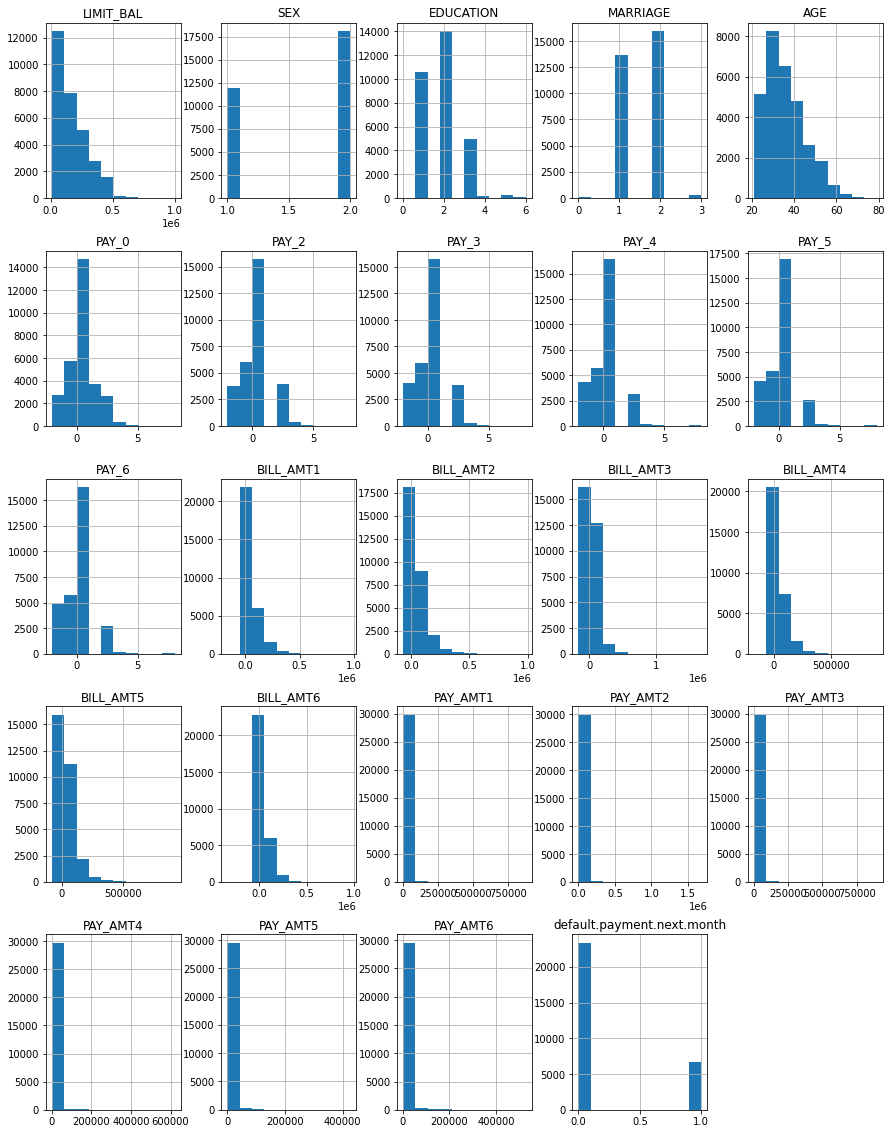

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax=ax)

## 1. Obtener un resumen numérico descriptivo de todas las variables del archivo. ¿Qué tipo de 
variables se tienen: numéricas, categóricas?  

Nuestras variables categóricas son: 


1.   SEX
2.   EDUCATION
3.   MARRIAGE
4.   PAYS



### Cercioramos que el valor 0 en los datos PAY_N... está en 21, 173 datos, lo que nos indica que es un dato relevante el cuál significa que un usuario pago en tiempo. 

In [ ]:
len(data[(data['PAY_0'] == 0) | (data['PAY_2'] == 0) | (data['PAY_3'] == 0) | ( data['PAY_4'] == 0)  | (data['PAY_5'] == 0)  | ( data['PAY_6'] == 0 )])

21173

In [ ]:
len(data[(data['EDUCATION'] == 0) | (data['EDUCATION'] == 5) | (data['EDUCATION']== 6) | (data['MARRIAGE'] == 0) ])

399

In [ ]:
print('Porcentaje de valores faltantes'.format(round(399/len(data) * 100,2)))

Porcentaje de valores faltantes


In [ ]:
data = data[(data['EDUCATION'] != 0) & (data['EDUCATION'] != 5) & (data['EDUCATION'] != 6) & (data['MARRIAGE'] != 0) ]
len(data)

29601

### 2. ¿Existen datos perdidos? Indica las decisiones que tomarás con base a los datos perdidos. 

Si tenemos 399 datos perdidos en EDUCATION y MARRIAGE. Los ceros son datos que no conocemos. Por la cantidad tan pequeña de datos, podemos eliminar los mismos y no tendrá un impacto negativo en nuestros modelos. 

In [ ]:
data.dtypes

LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [ ]:
data.rename({'PAY_0':'PAY_1','default.payment.next.month':'DEFAULT'},axis = 1,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

### 3. Verifica la descripción dada de cada variable en el artículo citado y compáralo con tus resultados. 
¿Obervas algunas discrepancias en algunos niveles de las variables? ¿A qué atribuyes dicha 
dscrepancia? ¿Cómo enfrentarás dicha discrepancia? ¿Los autores del artículo mecionan algo a 
respecto?  

Si la cantidad de datos en el artículo mencionado es de 25,000 y en nuestros datos por el momento tenemos alrededor de 29,600. Probablemente los autores del artículo quitaron outliers de alguna de las variables y por ende se redujo su número de datos. 



### 4. Verifica las frecuencias de cada nivel de las variables categóricas. ¿Qué decisiones podrías tomar 




2    15806
1    13477
3      318
Name: MARRIAGE, dtype: int64
------------------------------


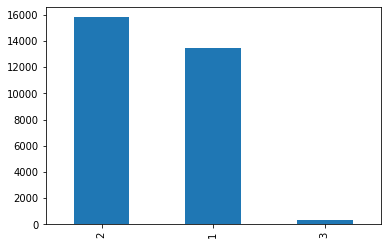

In [ ]:
print(data["MARRIAGE"].value_counts())
print("------------------------------")
data['MARRIAGE'].value_counts().plot(kind='bar')

In [ ]:
data["MARRIAGE"].value_counts()


2    15806
1    13477
3      318
Name: MARRIAGE, dtype: int64

2    14024
1    10581
3     4873
4      123
Name: EDUCATION, dtype: int64
------------------------------


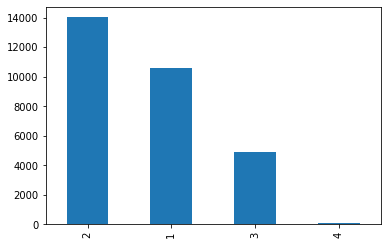

In [ ]:
print(data['EDUCATION'].value_counts())
print("------------------------------")
data['EDUCATION'].value_counts().plot(kind='bar')

2    17855
1    11746
Name: SEX, dtype: int64
------------------------------


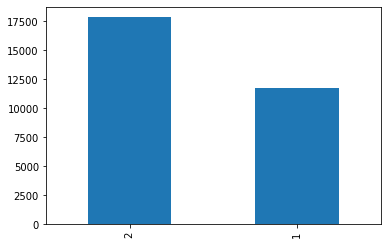

In [ ]:
print(data['SEX'].value_counts())
print("------------------------------")
data['SEX'].value_counts().plot(kind='bar')

 0    14499
-1     5633
 1     3662
-2     2708
 2     2640
 3      320
 4       76
 5       24
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64
------------------------------


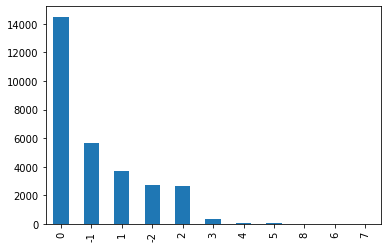

In [ ]:
print(data['PAY_1'].value_counts())
print("------------------------------")
data['PAY_1'].value_counts().plot(kind='bar')

 0    15476
-1     5990
 2     3904
-2     3722
 3      326
 4       97
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
------------------------------


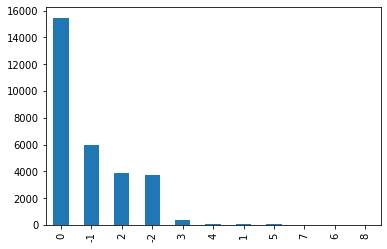

In [ ]:
print(data['PAY_2'].value_counts())
print("------------------------------")
data['PAY_2'].value_counts().plot(kind='bar')

 0    15518
-1     5863
-2     4027
 2     3802
 3      237
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
------------------------------


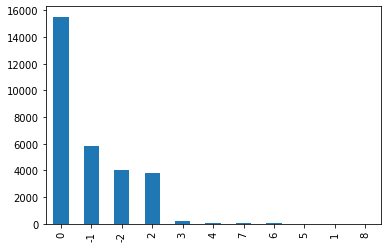

In [ ]:
print(data['PAY_3'].value_counts())
print("------------------------------")
data['PAY_3'].value_counts().plot(kind='bar')

 0    16204
-1     5617
-2     4287
 2     3142
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64
------------------------------


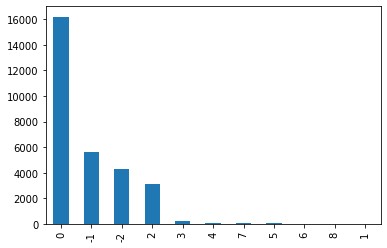

In [ ]:
print(data['PAY_4'].value_counts())
print("------------------------------")
data['PAY_4'].value_counts().plot(kind='bar')

 0    16684
-1     5480
-2     4479
 2     2617
 3      177
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64
------------------------------


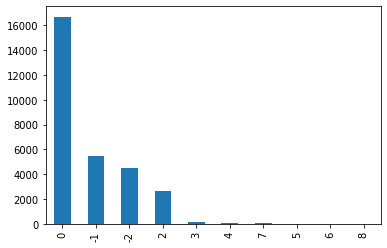

In [ ]:
print(data['PAY_5'].value_counts())
print("------------------------------")
data['PAY_5'].value_counts().plot(kind='bar')

 0    16053
-1     5674
-2     4806
 2     2756
 3      183
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64
------------------------------


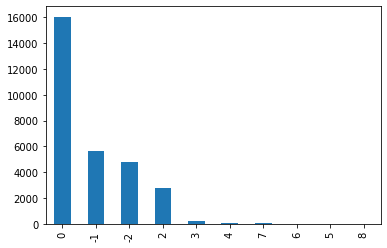

In [ ]:
print(data['PAY_6'].value_counts())
print("------------------------------")
data['PAY_6'].value_counts().plot(kind='bar')

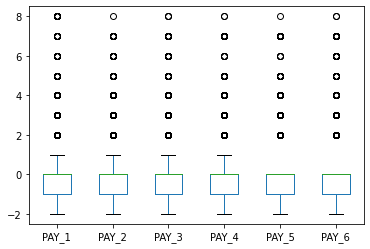

In [ ]:
data[['PAY_1',  'PAY_2', 'PAY_3', 'PAY_4','PAY_5', 'PAY_6']].plot.box()

In [ ]:
X = data.drop(['DEFAULT'],axis = 1).copy()
y = data['DEFAULT'].copy()

In [ ]:
X_encoded = pd.get_dummies(X,columns = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-2,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,...,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


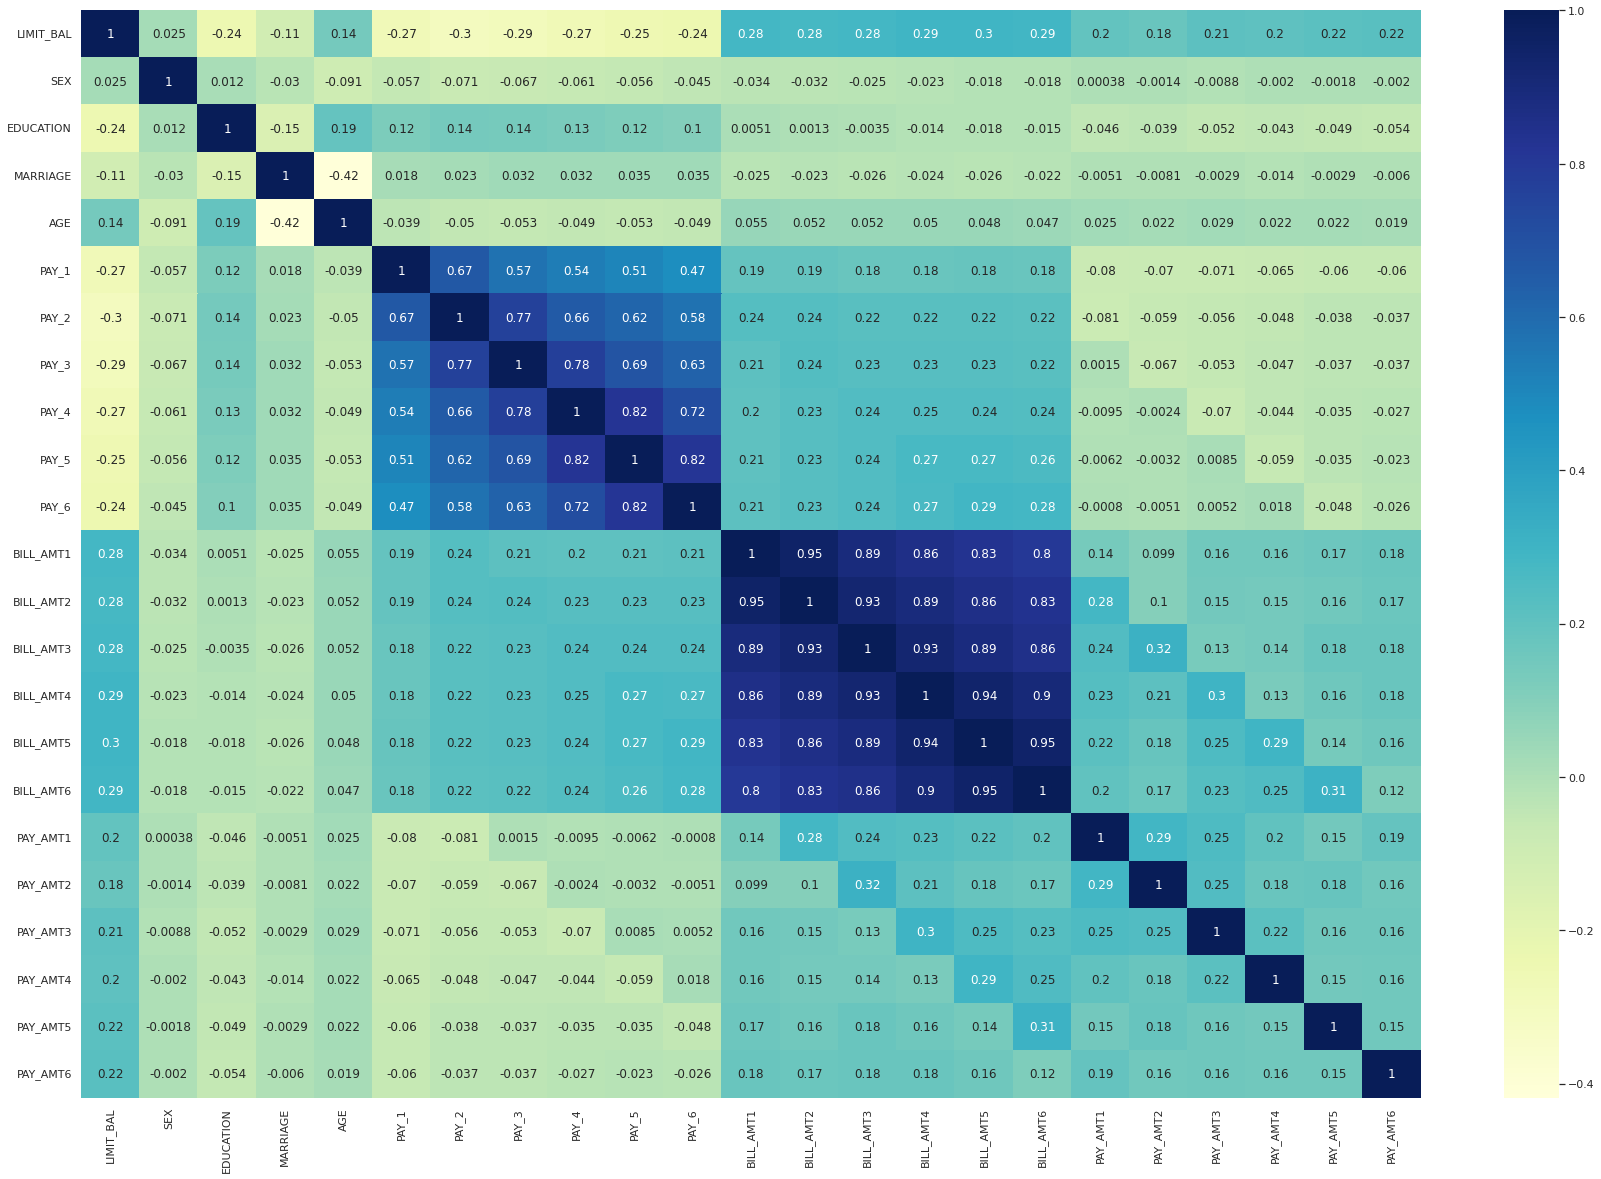

In [ ]:
sns.set_theme(style="white")
corr = X.corr()
# Draw the heatmap with the mask and correct aspect ratio
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.subplots(figsize=(30,20))

sns.heatmap(corr, cmap="YlGnBu", annot=True)

# Parte 2: Aprendizaje de Máquinas

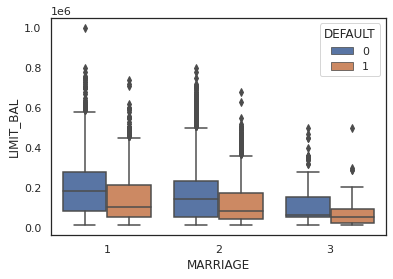

In [ ]:
  # LIMIT_BAL, MARRIAGE y dpnm, donde dpnm denota “default payment next month”. 

marriage_lim_bal = data[["LIMIT_BAL", "DEFAULT", "MARRIAGE"]]
sns.boxplot(x="MARRIAGE", y="LIMIT_BAL", data=marriage_lim_bal, hue='DEFAULT')

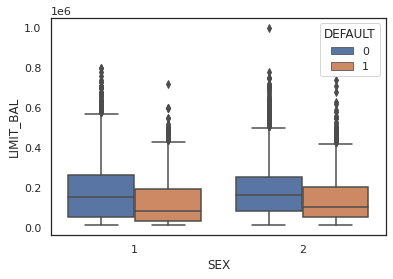

In [ ]:
  # LIMIT_BAL, SEX y dpnm, donde dpnm denota “default payment next month”. 

marriage_lim_gen = data[["LIMIT_BAL", "DEFAULT", "SEX"]]
sns.boxplot(x="SEX", y="LIMIT_BAL", data=marriage_lim_gen, hue='DEFAULT')

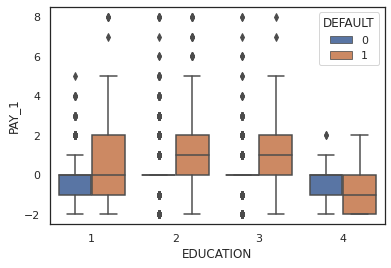

In [ ]:
  # LIMIT_BAL, SEX y dpnm, donde dpnm denota “default payment next month”. 

marriage_lim_gen = data[["BILL_AMT1", "DEFAULT", "EDUCATION", "PAY_1"]]
ax = sns.boxplot(x="EDUCATION", y="PAY_1", data=marriage_lim_gen, hue='DEFAULT')


In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import KFold
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing as prep
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score), 
           'roc_auc': make_scorer(roc_auc_score)
           }

sc = prep.StandardScaler()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)
Y = data["DEFAULT"]
X = data

# X = pd.get_dummies(X,columns = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
X.drop("DEFAULT", inplace=True, axis=1)
trainX, testX, trainY, testY = model_selection.train_test_split(X, Y, train_size=0.8, shuffle=True,  random_state=None)


trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)



In [ ]:
testX

array([[ 2.55816061,  0.80840325,  0.25610633, ..., -0.07505771,
        -0.08806283, -0.11198711],
       [ 0.48141282,  0.80840325,  0.25610633, ..., -0.13071045,
        -0.08066305, -0.1565727 ],
       [-0.05700327, -1.23700641,  0.25610633, ...,  0.05988624,
         0.52231891,  0.06044085],
       ...,
       [-1.05691887,  0.80840325,  0.25610633, ...,  0.03823316,
        -0.31692264,  0.2746678 ],
       [-1.13383546,  0.80840325, -1.14903686, ..., -0.29977816,
        -0.31692264, -0.29402598],
       [-0.98000229, -1.23700641,  1.66124952, ..., -0.22036287,
        -0.00813189, -0.29402598]])

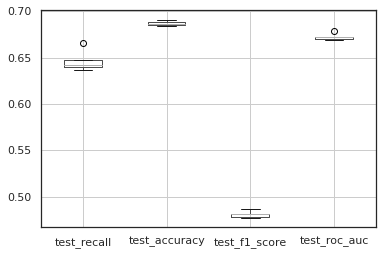

In [ ]:

lr_model = LogisticRegression(class_weight="balanced")
lr_scores = cross_validate(lr_model, trainX, trainY, scoring=scoring, cv=cv)

lr_complete_scores = pd.DataFrame(lr_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(lr_complete_scores).boxplot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Epoch 1/100
38/38 [==============================] - 1s 5ms/step - loss: 0.6305 - accuracy: 0.7321
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.5291 - accuracy: 0.7736
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4920 - accuracy: 0.7887
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4784 - accuracy: 0.8012
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4722 - accuracy: 0.8045
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4690 - accuracy: 0.8063
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 0.4641 - accuracy: 0.8083
Epoch 8/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4612 - accuracy: 0.8100
Epoch 9/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4582 - accuracy: 0.8121
Epoch 10/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4591 - accuracy: 0.8109
Epoch 11/

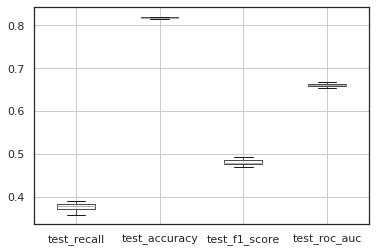

In [ ]:
### ANN
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

from keras.layers.core import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot
# from sklearn.preprocessing import StandardScaler

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


input_dim = trainX.shape[1]

# trainYAnn = to_categorical(trainY, 2)
testYAnn = to_categorical(testY, 2)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

def create_model():
	# create model
	model = Sequential()
	model.add(Dense(units=50, input_dim=23, activation='relu', kernel_initializer='uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(40, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(30, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(20, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

neural_network = KerasClassifier(build_fn=create_model, 
                                 epochs=100, 
                                 batch_size=500, 
                                 verbose=1)
ann_scores = cross_validate(neural_network, trainX, trainY, scoring=scoring, cv=cv)
ann_complete_scores = pd.DataFrame(ann_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(ann_complete_scores).boxplot()

In [ ]:
print(ann_complete_scores)

   test_recall  test_accuracy  test_f1_score  test_roc_auc
0     0.382519       0.818623       0.486551      0.663754
1     0.390977       0.820101       0.494062      0.667711
2     0.371241       0.816934       0.476765      0.658660
3     0.359023       0.817990       0.469865      0.655001
4     0.378175       0.815878       0.479714      0.660364


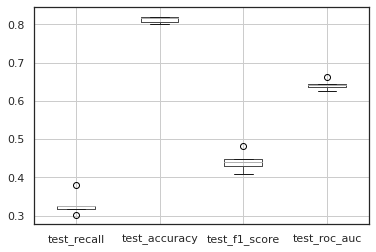

In [ ]:
## Decision Tree Classifier
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)

tree_cv_scores = cross_validate(tree_cv, trainX, trainY, scoring=scoring, cv=cv)
tree_cv_complete_scores = pd.DataFrame(tree_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(tree_cv_complete_scores).boxplot()


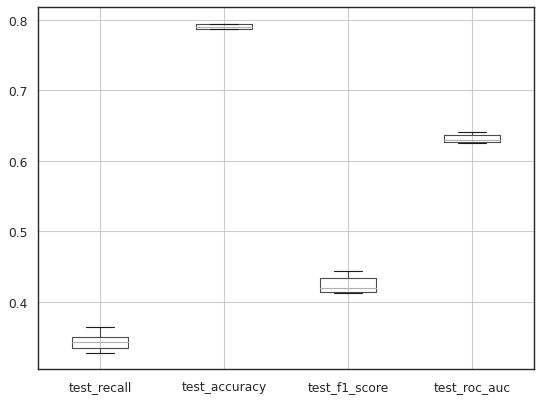

In [ ]:
## KNN (Nearest Neighbors)

knn = KNeighborsClassifier(n_neighbors=5)
knn_cv_scores = cross_validate(knn, trainX, trainY, scoring=scoring, cv=cv)
knn_cv_complete_scores = pd.DataFrame(knn_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(knn_cv_complete_scores).boxplot()

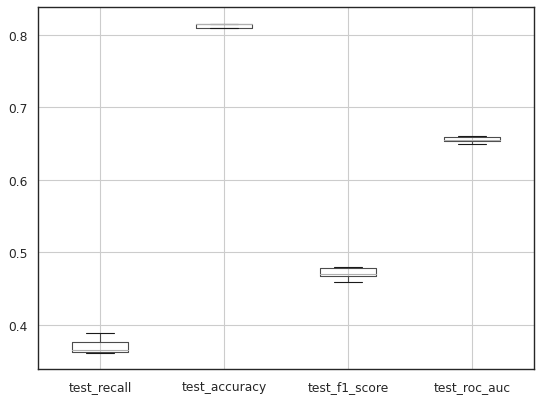

In [ ]:
## Random Forest

rf = RandomForestClassifier()

clf_cv_scores = cross_validate(rf, trainX, trainY, scoring=scoring, cv=cv)
clf_cv_complete_scores = pd.DataFrame(clf_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(clf_cv_complete_scores).boxplot()

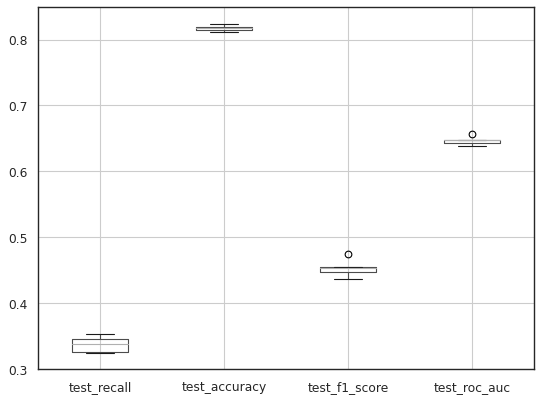

In [ ]:
### SVM
svm_model = SVC(gamma='auto')

svm_scores = cross_validate(svm_model, trainX, trainY, scoring=scoring, cv=cv)
clf_cv_complete_scores = pd.DataFrame(svm_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(clf_cv_complete_scores).boxplot()

In [ ]:
## ANN
ann_model = create_model()
history = ann_model.fit(trainX, trainY, epochs=100, batch_size=500, validation_split=0.4)
ann_pred_proba = ann_model.predict(testX)
ann_pred_predict = ann_model.predict(testX)

Epoch 1/100
29/29 [==============================] - 1s 13ms/step - loss: 0.6593 - accuracy: 0.7226 - val_loss: 0.5750 - val_accuracy: 0.7748
Epoch 2/100
29/29 [==============================] - 0s 7ms/step - loss: 0.5394 - accuracy: 0.7764 - val_loss: 0.4901 - val_accuracy: 0.7837
Epoch 3/100
29/29 [==============================] - 0s 7ms/step - loss: 0.4967 - accuracy: 0.7941 - val_loss: 0.4619 - val_accuracy: 0.8096
Epoch 4/100
29/29 [==============================] - 0s 7ms/step - loss: 0.4856 - accuracy: 0.8032 - val_loss: 0.4554 - val_accuracy: 0.8130
Epoch 5/100
29/29 [==============================] - 0s 6ms/step - loss: 0.4767 - accuracy: 0.8087 - val_loss: 0.4536 - val_accuracy: 0.8129
Epoch 6/100
29/29 [==============================] - 0s 7ms/step - loss: 0.4730 - accuracy: 0.8102 - val_loss: 0.4536 - val_accuracy: 0.8139
Epoch 7/100
29/29 [==============================] - 0s 7ms/step - loss: 0.4730 - accuracy: 0.8090 - val_loss: 0.4505 - val_accuracy: 0.8133
Epoch 8/100


In [ ]:
print(ann_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 50)                1200      
                                                                 
 dropout_25 (Dropout)        (None, 50)                0         
                                                                 
 dense_31 (Dense)            (None, 40)                2040      
                                                                 
 dropout_26 (Dropout)        (None, 40)                0         
                                                                 
 dense_32 (Dense)            (None, 30)                1230      
                                                                 
 dropout_27 (Dropout)        (None, 30)                0         
                                                                 
 dense_33 (Dense)            (None, 20)               

In [ ]:
# LR
lr_model = LogisticRegression(class_weight="balanced")
lr_model = lr_model.fit(trainX, trainY)
lr_model_proba = lr_model.predict_proba(testX)[::,1]
lr_pred = lr_model.predict(testX)

In [ ]:
print(classification_report(testY, lr_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.78      4635
           1       0.38      0.64      0.48      1286

    accuracy                           0.70      5921
   macro avg       0.63      0.68      0.63      5921
weighted avg       0.77      0.70      0.72      5921



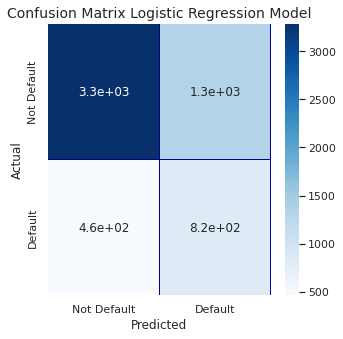

In [ ]:
cm = confusion_matrix(testY, lr_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Logistic Regression Model', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
## SVM
svm_model = SVC(gamma='auto', probability=True, kernel='linear')
svm_model = svm_model.fit(trainX, trainY)
svm_pred_proba = svm_model.predict_proba(testX)[::,1]
svm_pred = svm_model.predict(testX)

In [ ]:
svm_pred = svm_model.predict(testX)
print(classification_report(testY, svm_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4635
           1       0.69      0.24      0.35      1286

    accuracy                           0.81      5921
   macro avg       0.76      0.60      0.62      5921
weighted avg       0.79      0.81      0.77      5921



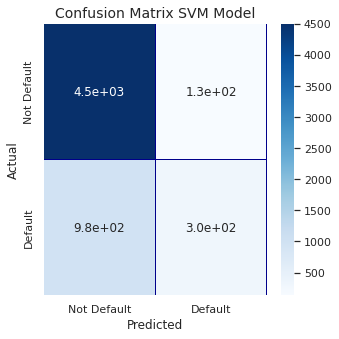

In [ ]:
cm = confusion_matrix(testY, svm_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix SVM Model', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
## Random Forest
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(trainX, trainY)
rf_pred_proba = rf_model.predict_proba(testX)[::,1]
rf_pred = rf_model.predict(testX)

In [ ]:
print("CLASSIFICATION REPORT RANDOM FOREST")
print(classification_report(testY, rf_pred))

CLASSIFICATION REPORT RANDOM FOREST
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4635
           1       0.65      0.36      0.46      1286

    accuracy                           0.82      5921
   macro avg       0.75      0.65      0.68      5921
weighted avg       0.80      0.82      0.80      5921



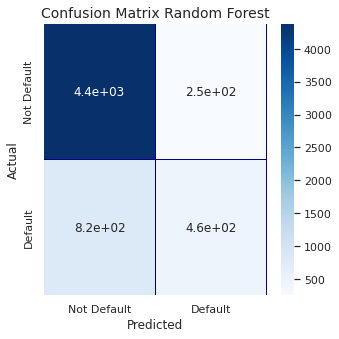

In [ ]:
cm = confusion_matrix(testY, rf_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Random Forest', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

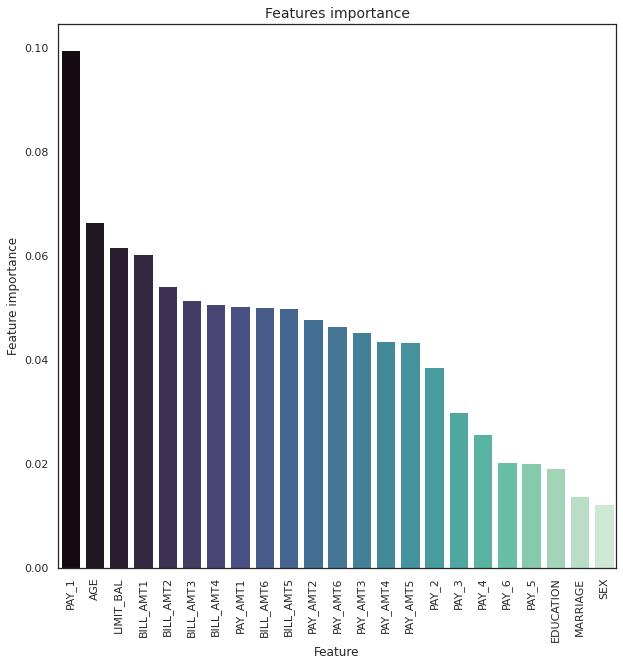

In [80]:
x_col_names = []
for col in X.columns:
  x_col_names.append(col)

tmp = pd.DataFrame({'Feature': x_col_names, 'Feature importance': rf_model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,10))
plt.title('Features importance',fontsize=14)
sns.color_palette("mako", as_cmap=True)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="mako")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [ ]:
## KNN 
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model = knn_model.fit(trainX, trainY)
knn_model_proba = knn_model.predict_proba(testX)[::,1]
knn_model_pred = knn_model.predict(testX)

In [ ]:
print("CLASSIFICATION REPORT RANDOM FOREST")
print(classification_report(testY, knn_model_pred))

CLASSIFICATION REPORT RANDOM FOREST
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4635
           1       0.56      0.35      0.43      1286

    accuracy                           0.80      5921
   macro avg       0.70      0.64      0.65      5921
weighted avg       0.78      0.80      0.78      5921



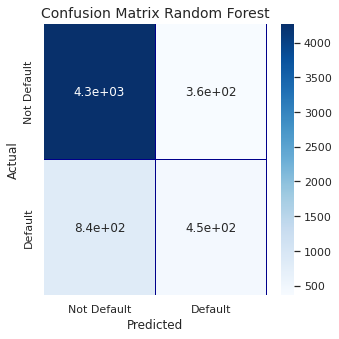

In [ ]:
cm = confusion_matrix(testY, knn_model_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Random Forest', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
## Decision Tree Classifier
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)
tree_model = tree_cv.fit(trainX, trainY)
tree_pred_proba = tree_model.predict_proba(testX)[::,1]
tree_pred = tree_model.predict(testX)

In [ ]:
print("CLASSIFICATION REPORT DECISION TREE")
print(classification_report(testY, tree_pred))

CLASSIFICATION REPORT DECISION TREE
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4635
           1       0.65      0.38      0.48      1286

    accuracy                           0.82      5921
   macro avg       0.75      0.66      0.68      5921
weighted avg       0.80      0.82      0.80      5921



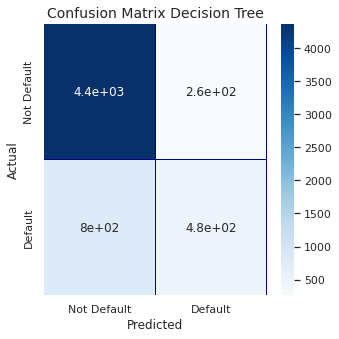

In [ ]:
cm = confusion_matrix(testY, tree_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Decision Tree', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

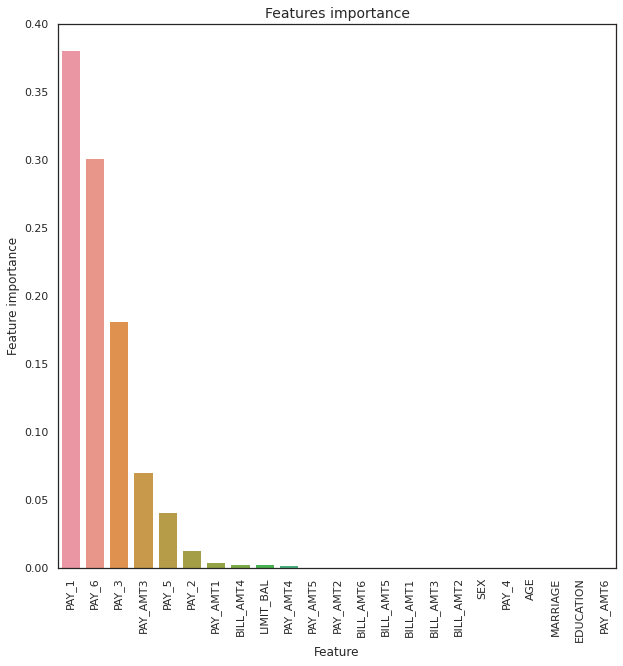

In [ ]:
tmp = pd.DataFrame({'Feature': x_col_names, 'Feature importance': tree_model.best_estimator_.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,10))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="mako")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [ ]:

### Curvas ROC
lr_auc = roc_auc_score(testY, lr_model_proba)
lr_fpr, lr_tpr, _ = roc_curve(testY, lr_model_proba)

ann_auc = roc_auc_score(testY, ann_pred_proba)
ann_fpr, ann_tpr, _ = roc_curve(testY, ann_pred_proba)

svm_auc = roc_auc_score(testY, svm_pred_proba)
svm_fpr, svm_tpr, _ = roc_curve(testY, svm_pred_proba)

rf_auc = roc_auc_score(testY, rf_pred_proba)
rf_fpr, rf_tpr, _ = roc_curve(testY, rf_pred_proba)

knn_auc = roc_auc_score(testY, knn_model_proba)
knn_fpr, knn_tpr, _ = roc_curve(testY, knn_model_proba)

tree_auc = roc_auc_score(testY, tree_pred_proba)
tree_fpr, tree_tpr, _ = roc_curve(testY, tree_pred_proba)



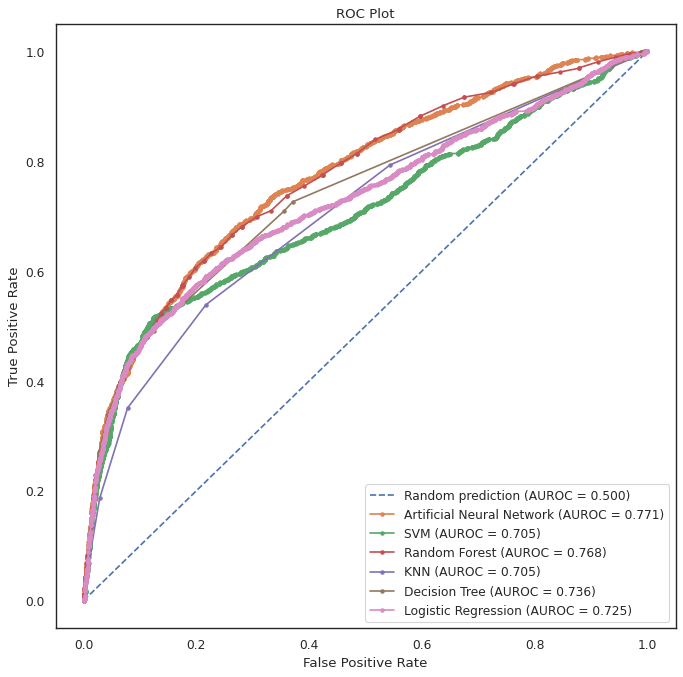

In [ ]:
r_probs = [0 for _ in range(len(testY))]
r_auc = roc_auc_score(testY, r_probs)
r_fpr, r_tpr, _ = roc_curve(testY, r_probs)
figure(figsize=(10, 10), dpi=80)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(ann_fpr, ann_tpr, marker='.', label='Artificial Neural Network (AUROC = %0.3f)' % ann_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(tree_fpr, tree_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % tree_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [ ]:
print(testY)

9090     0
10924    0
1744     0
22435    0
22810    0
        ..
18690    0
1063     0
8141     0
14414    1
8543     0
Name: DEFAULT, Length: 5921, dtype: int64


# Part 3

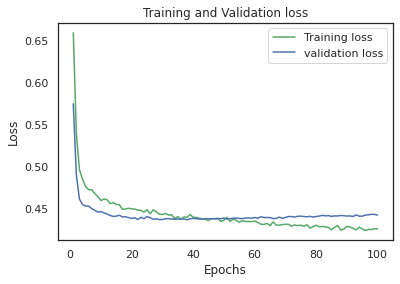

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

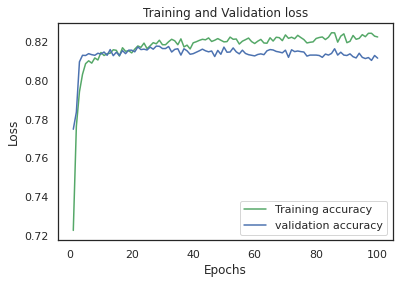

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()